## Project 2 - Data Cleansing Practice on Zillow Data

In this week, we’ll practice how to do regular cleansing in Python with a real-world dataset – Zillow dataset. This Zillow dataset contains abundant missing data and will provide you a good environment to practice your skills on data cleaning.

This step-by-step project will illustrate you various ways to impute missing values.

In [1]:
# Start with importing essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. Read the train set and property set of Zillow dataset, and name them as train and properties.

In [2]:
train = pd.read_csv('train_2017.csv')
properties = pd.read_csv('properties_2017.csv')

C:\Users\wymyy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(train.shape, properties.shape)

(77613, 3) (2985217, 58)


In [5]:
train.head()

,parcelid,logerror,transactiondate
0,14297519,0.025595,2017-01-01
1,17052889,0.055619,2017-01-01
2,14186244,0.005383,2017-01-01
3,12177905,-0.103410,2017-01-01
4,10887214,0.006940,2017-01-01


In [6]:
properties.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2016.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,5.0,NaN,NaN,NaN,...,1.0,NaN,660680.0,1434941.0,2016.0,774261.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,6.0,NaN,NaN,...,1.0,NaN,580059.0,1174475.0,2016.0,594416.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,1.0,NaN,196751.0,440101.0,2016.0,243350.0,5725.17,NaN,NaN,NaN


#### 2. Merge train and properties to one dataframe on parcelid and call it as df_train. Drop the column of 'parcelid' and 'transactiondate'. Check the first 5 rows to see how this merged dataset looks like.

In [10]:
df_train = properties.merge(train, how="inner", left_on="parcelid", right_on="parcelid")

In [12]:
df_train.shape

(77613, 60)

In [13]:
df_train = df_train.drop(columns = ['parcelid', 'transactiondate'])
df_train.shape

(77613, 58)

#### 3.  (a) Generate a dataframe called missing_df from df_train, in which there are two columns, one is the column names of our features, the other column is the missing_count (the number of missing values) of that feature. The table should be ordered by missing_count decendingly.  

In [19]:
missing_df = df_train.isna().sum().sort_values(ascending=False)
missing_df

buildingclasstypeid             77598
finishedsquarefeet13            77571
storytypeid                     77563
basementsqft                    77563
yardbuildingsqft26              77543
fireplaceflag                   77441
architecturalstyletypeid        77406
typeconstructiontypeid          77390
finishedsquarefeet6             77227
pooltypeid10                    77148
decktypeid                      76999
poolsizesum                     76744
pooltypeid2                     76539
hashottuborspa                  76074
yardbuildingsqft17              75220
taxdelinquencyflag              74713
taxdelinquencyyear              74713
finishedsquarefeet15            74586
finishedfloor1squarefeet        71576
finishedsquarefeet50            71576
fireplacecnt                    69324
threequarterbathnbr             67507
pooltypeid7                     62534
poolcnt                         61439
numberofstories                 60014
airconditioningtypeid           52606
garagetotals

#### 3.(b) Draw a horizontal bar plot to visualize it.

<AxesSubplot:>

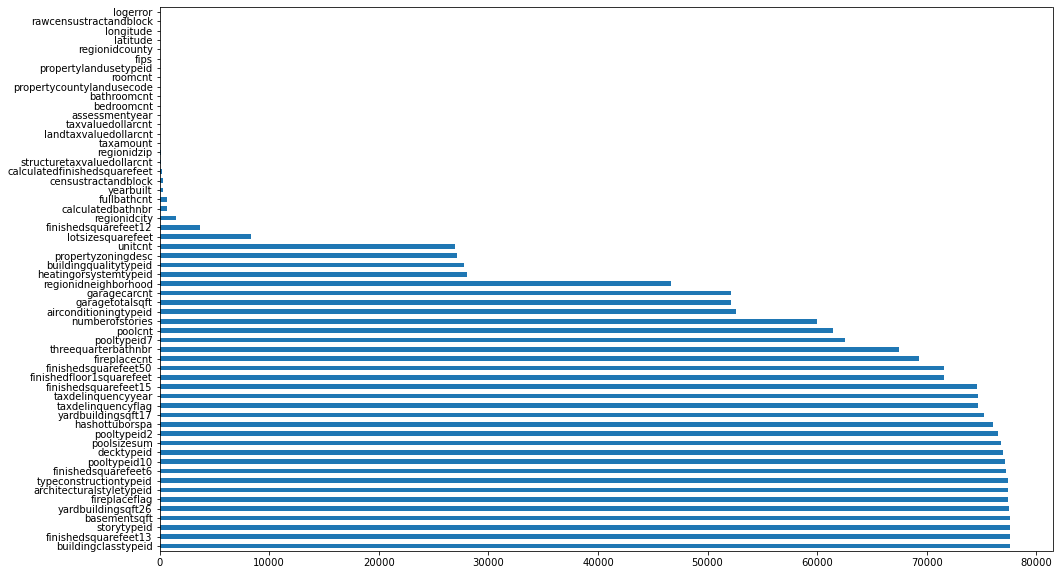

In [25]:
missing_df.plot.barh(figsize = (16,10))

#### 4. Generate the correlation matrix for all the numerical features, and plot it by using heatmap or related visualization methods. 

(53, 53)


<AxesSubplot:>

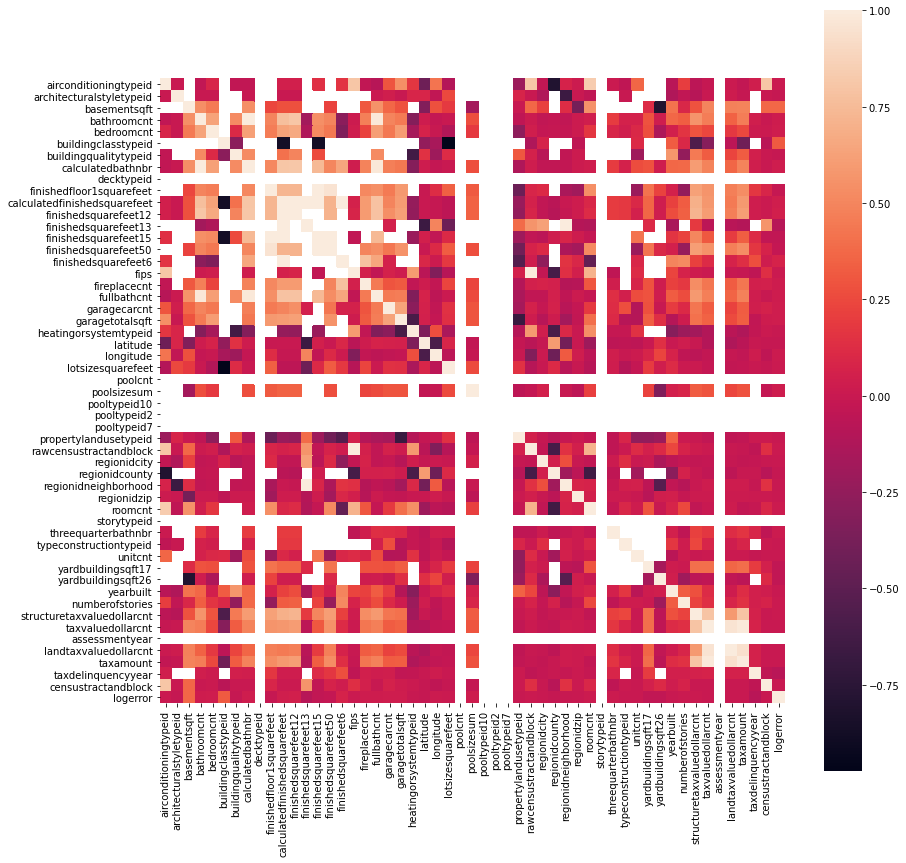

In [100]:
# Need to select the numerical values before running correlation matrix

corr_matrix = df_train.select_dtypes(include=['float64', 'int64']).corr()
print(corr_matrix.shape)

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, square = True)

#### 5. From the results from Step 4, please list those features having a strong correlation. Generate a list called dropcols, and put those redundent variables into it.

In [54]:
# Select only the upper half of the correlation matrix to avoid double selection

upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
dropcols = [column for column in upper_corr_matrix.columns if any(upper_corr_matrix[column] > 0.90)]  # Set dropping threshold to be 0.9
print(dropcols)
# Look at how many features are highly correlated with other features
print(len(dropcols))

['calculatedbathnbr', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fullbathcnt', 'rawcensustractandblock', 'regionidneighborhood', 'landtaxvaluedollarcnt', 'taxamount']
11


In [74]:
# Check whether those features are highly correlated to other features

for col in dropcols:
    print(upper_corr_matrix[upper_corr_matrix[col] > 0.90][[col]])
    print('-----------------------------------')

             calculatedbathnbr
bathroomcnt                1.0
-----------------------------------
                              finishedsquarefeet12
calculatedfinishedsquarefeet                   1.0
-----------------------------------
                              finishedsquarefeet13
calculatedfinishedsquarefeet                   1.0
-----------------------------------
                              finishedsquarefeet15
finishedfloor1squarefeet                       1.0
calculatedfinishedsquarefeet                   1.0
-----------------------------------
                          finishedsquarefeet50
finishedfloor1squarefeet              0.958542
finishedsquarefeet15                  1.000000
-----------------------------------
                              finishedsquarefeet6
calculatedfinishedsquarefeet                  1.0
-----------------------------------
                   fullbathcnt
bathroomcnt           0.984499
calculatedbathnbr     0.984499
-------------------------------

#### 6. Some variables where it is NA can be considered as the object does not exist. Such as 'hashottuborspa', if it is NA, we can assume the house doesn't contain the hot tub or spa. So we need to fix this kind of variables.

(a) Fix the hashottuborspa variable, fill the na part as None.

In [197]:
# Make a copy of previous dataset

df_train_impute = df_train.copy()

df_train_impute[['hashottuborspa']] = df_train_impute['hashottuborspa'].fillna('None')

In [198]:
# Check whether we achieved the goal we want

print(df_train['hashottuborspa'].unique())
print(df_train_impute['hashottuborspa'].unique())

[nan True]
['None' True]


(b) Assume if the pooltype id and its related features is null then pool/hottub doesn't exist.

In [199]:
# Check the possible values for the pooltype id and its related features

print(df_train_impute.columns)
print('------------------------------------------------------------------------')
print(df_train_impute.pooltypeid10.unique())
print(df_train_impute.pooltypeid2.unique())
print(df_train_impute.pooltypeid7.unique())
print(df_train_impute.fullbathcnt.unique())

Index(['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'y

In [200]:
# Assign 0 to those NULL values

df_train_impute[['pooltypeid10']] = df_train_impute['pooltypeid10'].fillna(0)
df_train_impute[['pooltypeid2']] = df_train_impute['pooltypeid2'].fillna(0)
df_train_impute[['pooltypeid7']] = df_train_impute['pooltypeid7'].fillna(0)
df_train_impute[['fullbathcnt']] = df_train_impute['fullbathcnt'].fillna(0)

# Recheck those values after filling NA values
print(df_train_impute.pooltypeid10.unique())
print(df_train_impute.pooltypeid2.unique())
print(df_train_impute.pooltypeid7.unique())
print(df_train_impute.fullbathcnt.unique())

[0. 1.]
[0. 1.]
[1. 0.]
[ 5.  2.  1.  0.  3.  4.  6.  7. 10.  8.  9. 11. 18. 13.]


(c) taxdeliquencyflag - assume if it is null then doesn't exist

In [201]:
print(df_train_impute.taxdelinquencyflag.unique())
df_train_impute[['taxdelinquencyflag']] = df_train_impute['taxdelinquencyflag'].fillna('N')
print(df_train_impute.taxdelinquencyflag.unique())

[nan 'Y']
['N' 'Y']


(d) If Null in garage count (garagecarcnt) it means there are no garages, and no garage means the size (garagetotalsqft) is 0 by default

In [202]:
print("Before imputing the NULL")
print(df_train_impute.garagecarcnt.isna().sum())
print(df_train_impute.garagetotalsqft.isna().sum())
print(df_train_impute.garagecarcnt.unique())

df_train_impute.loc[df_train_impute['garagecarcnt'].isna(), 'garagetotalsqft'] = 0
df_train_impute[['garagecarcnt']] = df_train_impute['garagecarcnt'].fillna(0)

print()
print("After imputing the NULL")
print(df_train_impute.garagecarcnt.isna().sum())
print(df_train_impute.garagetotalsqft.isna().sum())
print(df_train_impute.garagecarcnt.unique())

Before imputing the NULL
52093
52093
[ 3.  1.  0.  2. nan  4.  5.  6. 14.  7.  8.  9. 10. 11. 13.]

After imputing the NULL
0
0
[ 3.  1.  0.  2.  4.  5.  6. 14.  7.  8.  9. 10. 11. 13.]


#### 7. There are more missing values in the 'poolsizesum' than in 'poolcnt'. Fill in median values for poolsizesum where pool count is >0 and missing.

In [203]:
# Check the median value of poolsizesum

df_train_impute['poolsizesum'].median()

500.0

In [204]:
# Check the number of NULL values before imputing
print("Number of Null values in poolcnt:", df_train_impute['poolcnt'].isna().sum())
print("Number of Null values in poolsizesum:", df_train_impute['poolsizesum'].isna().sum())

df_train_impute['poolsizesum'] = df_train_impute.loc[(df_train_impute['poolcnt'] > 0) | (df_train_impute['poolcnt'].isna()), 'poolsizesum'].fillna(df_train_impute['poolsizesum'].median())

print()
print("After imputing")
print("Number of Null values in poolsizesum:", df_train_impute['poolsizesum'].isna().sum())

Number of Null values in poolcnt: 61439
Number of Null values in poolsizesum: 76744

After imputing
Number of Null values in poolsizesum: 0


#### 8. The number of missing value of 'fireplaceflag' is more than the 'fireplacecnt'. So we need to mark the missing 'fireplaceflag' as Yes when fireplacecnt>0, then the rest of 'fireplaceflag' should be marked as No. Then for the missing part in fireplacecnt, we can consider the number of fire place is 0.

In [205]:
# Check the number of NULL values before imputing
print("Number of Null values in fireplaceflag:", df_train_impute['fireplaceflag'].isna().sum())
print("Number of Null values in fireplacecnt:", df_train_impute['fireplacecnt'].isna().sum())

df_train_impute['fireplaceflag'] = df_train_impute.loc[(df_train_impute['fireplacecnt'] > 0) , 'fireplaceflag'].fillna('Yes')
df_train_impute['fireplaceflag'] = df_train_impute['fireplaceflag'].fillna('No')
df_train_impute['fireplacecnt'] = df_train_impute['fireplacecnt'].fillna(0)

print()
print("After imputing")
print("Number of Null values in fireplaceflag:", df_train_impute['fireplaceflag'].isna().sum())
print("Number of Null values in fireplacecnt:", df_train_impute['fireplacecnt'].isna().sum())

Number of Null values in fireplaceflag: 77441
Number of Null values in fireplacecnt: 69324

After imputing
Number of Null values in fireplaceflag: 0
Number of Null values in fireplacecnt: 0


#### 9. Fill some features with the most common value for those variables where this might be a sensible approach:

(a) AC Type (airconditioningtypeid)- Mostly 1's, which corresponds to central AC. It is reasonable to assume most other properties where this feature is missing are similar.

In [206]:
print("Look at the value distribution before imputing")
print(df_train_impute['airconditioningtypeid'].unique())
print(df_train_impute['airconditioningtypeid'].value_counts())

df_train_impute['airconditioningtypeid'] = df_train_impute['airconditioningtypeid'].fillna(1)

print()
print("After imputing")
print(df_train_impute['airconditioningtypeid'].unique())
print(df_train_impute['airconditioningtypeid'].value_counts())

Look at the value distribution before imputing
[nan  1. 13.  5. 11.  9.]
1.0     23186
13.0     1575
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64

After imputing
[ 1. 13.  5. 11.  9.]
1.0     75792
13.0     1575
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64


(b) heating or system (heatingorsystemtypeid)- Mostly 2, which corresponds to central heating so seems reasonable to assume most other properties have central heating.

In [207]:
print("Look at the value distribution before imputing")
print(df_train_impute['heatingorsystemtypeid'].unique())
print(df_train_impute['heatingorsystemtypeid'].value_counts())

df_train_impute['heatingorsystemtypeid'] = df_train_impute['heatingorsystemtypeid'].fillna(2)

print()
print("After imputing")
print(df_train_impute['heatingorsystemtypeid'].unique())
print(df_train_impute['heatingorsystemtypeid'].value_counts())

Look at the value distribution before imputing
[nan  2.  7.  6. 24. 20. 18.  1. 13. 10. 11.]
2.0     33633
7.0     14107
24.0      850
6.0       777
20.0      104
13.0       60
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64

After imputing
[ 2.  7.  6. 24. 20. 18.  1. 13. 10. 11.]
2.0     61675
7.0     14107
24.0      850
6.0       777
20.0      104
13.0       60
18.0       23
1.0        13
10.0        3
11.0        1
Name: heatingorsystemtypeid, dtype: int64


#### 10. If the features where missing proportion is too much, we can directly delete them. Here we set 97% as our threshold (This is subjective) and add them into the dropcols. Then drop those features in dropcols from the full table.

In [208]:
for item in df_train_impute.columns:
    null_rate = df_train_impute[item].isna().sum() / df_train_impute.shape[0]
    if null_rate > 0.97:
        dropcols.append(item)
        
print(dropcols)

['calculatedbathnbr', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fullbathcnt', 'rawcensustractandblock', 'regionidneighborhood', 'landtaxvaluedollarcnt', 'taxamount', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedsquarefeet13', 'finishedsquarefeet6', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft26', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedsquarefeet13', 'finishedsquarefeet6', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft26']


In [209]:
print("Features before drop:")
print(len(df_train_impute.columns))

print()
print("Features after drop:")
df_train_impute = df_train_impute.drop(columns = dropcols)
print(len(df_train_impute.columns))

Features before drop:
58

Features after drop:
40
